In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

In [2]:
df_basic_release = pd.read_csv('../independent_metrics/basic_release.csv', index_col='bug_id')
df_basic_beta = pd.read_csv('../independent_metrics/basic_beta.csv', index_col='bug_id')
df_basic_aurora = pd.read_csv('../independent_metrics/basic_aurora.csv', index_col='bug_id')

df_bug_inducing = pd.read_csv('../independent_metrics/bug_inducing.csv', index_col='bug_id')

df_release = pd.merge(df_basic_release, df_bug_inducing, left_index=True, right_index=True)
df_beta = pd.merge(df_basic_beta, df_bug_inducing, left_index=True, right_index=True)
df_aurora = pd.merge(df_basic_aurora, df_bug_inducing, left_index=True, right_index=True)

In [3]:
df_release = df_release[df_release.component != 'Pocket']
df_beta = df_beta[df_beta.component != 'Pocket']
df_aurora = df_aurora[df_aurora.component != 'Pocket']

In [4]:
df_release.shape

(285, 33)

In [5]:
df_beta.shape

(2614, 33)

In [6]:
df_aurora.shape

(4368, 33)

In [7]:
df_release.component = df_release.component.apply(lambda x: x.split(':')[0])
df_beta.component = df_beta.component.apply(lambda x: x.split(':')[0])
df_aurora.component = df_aurora.component.apply(lambda x: x.split(':')[0])

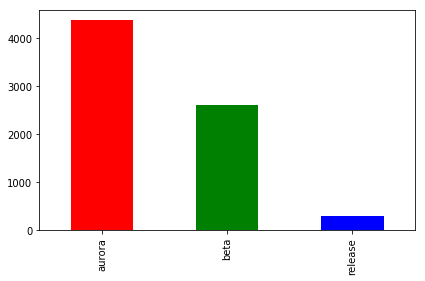

In [8]:
fig = plt.figure()
pd.Series({'release': len(df_release), 'beta': len(df_beta), 'aurora': len(df_aurora)}).plot.bar(color=['r', 'g', 'b'])
plt.tight_layout()
fig.savefig('uplifts_per_channel.pdf', format='pdf')